In [10]:
# Instalar e importar bibliotecas
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas instaladas e importadas!")

Bibliotecas instaladas e importadas!


In [11]:
# Baixar dados diretamente do seu GitHub
import requests
import os

# Criar pasta data se não existir
if not os.path.exists('data'):
    os.makedirs('data')

# Lista de arquivos para baixar
files = [
    'olist_customers_dataset.csv',
    'olist_orders_dataset.csv',
    'olist_order_items_dataset.csv',
    'olist_products_dataset.csv',
    'olist_sellers_dataset.csv',
    'olist_order_payments_dataset.csv',
    'olist_order_reviews_dataset.csv',
    'product_category_name_translation.csv'
]

# URL base do seu GitHub
base_url = 'https://raw.githubusercontent.com/Matheus-Diniz-Silva/portfolio-python-analise-dados/main/01-analise-exploratoria-pandas/data/'

# Baixar cada arquivo
for file in files:
    url = base_url + file
    response = requests.get(url)

    if response.status_code == 200:
        with open(f'data/{file}', 'wb') as f:
            f.write(response.content)
        print(f'{file} baixado com sucesso!')
    else:
        print(f'Erro ao baixar {file}')

print("Todos os arquivos baixados!")

olist_customers_dataset.csv baixado com sucesso!
olist_orders_dataset.csv baixado com sucesso!
olist_order_items_dataset.csv baixado com sucesso!
olist_products_dataset.csv baixado com sucesso!
olist_sellers_dataset.csv baixado com sucesso!
olist_order_payments_dataset.csv baixado com sucesso!
olist_order_reviews_dataset.csv baixado com sucesso!
product_category_name_translation.csv baixado com sucesso!
Todos os arquivos baixados!


In [12]:
# Análise exploratória inicial
print("=== ANÁLISE EXPLORATÓRIA - DATASET OLIST ===\n")

# Carregar dados principais
customers = pd.read_csv('data/olist_customers_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')

print(" DIMENSÕES DOS DATAFRAMES:")
print(f"Customers: {customers.shape}")
print(f"Orders: {orders.shape}")
print(f"Order Items: {order_items.shape}")
print(f"Products: {products.shape}")

print("\n PRIMEIRAS LINHAS - CUSTOMERS:")
display(customers.head())

print("\n INFORMAÇÕES GERAIS - CUSTOMERS:")
customers.info()

=== ANÁLISE EXPLORATÓRIA - DATASET OLIST ===

 DIMENSÕES DOS DATAFRAMES:
Customers: (99441, 5)
Orders: (99441, 8)
Order Items: (112650, 7)
Products: (32951, 9)

 PRIMEIRAS LINHAS - CUSTOMERS:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



 INFORMAÇÕES GERAIS - CUSTOMERS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


=== ANALISE DETALHADA DOS DATASETS ===
ESTATISTICAS DESCRITIVAS - CUSTOMERS:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                         

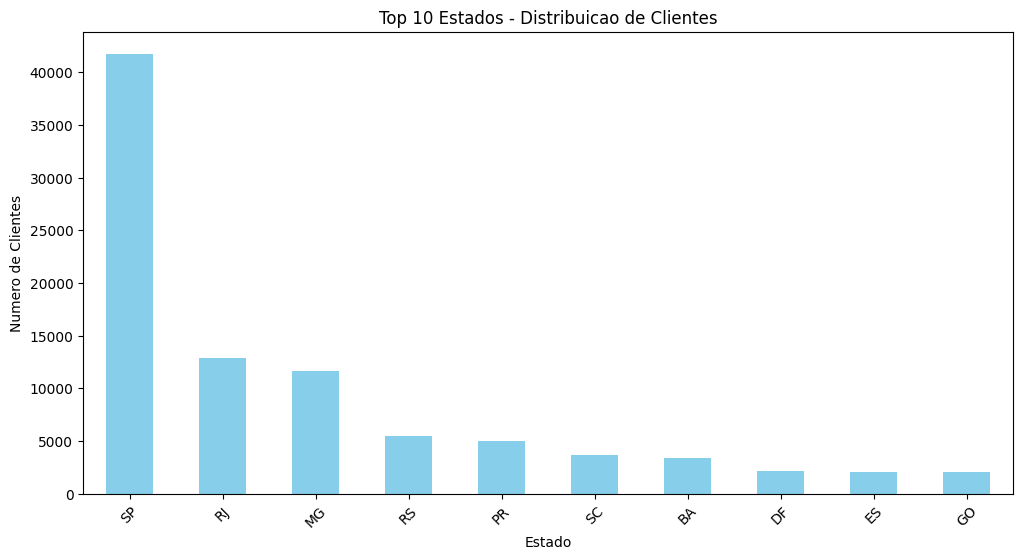

VALORES UNICOS:
Total customer_id: 99441
Total customer_unique_id: 96096
Estados unicos: 27
Cidades unicas: 4119


In [13]:
# Análise mais detalhada dos datasets
print("=== ANALISE DETALHADA DOS DATASETS ===")

# 1. ANALISE ESTATISTICA DOS CUSTOMERS
print("ESTATISTICAS DESCRITIVAS - CUSTOMERS:")
print(customers.describe(include='all'))

# 2. ANALISE DE DISTRIBUICAO GEOGRAFICA
print("DISTRIBUICAO POR ESTADO - CUSTOMERS:")
estado_distribuicao = customers['customer_state'].value_counts()
print(estado_distribuicao.head(10))

# 3. PRIMEIRA VISUALIZACAO
print("GRAFICO - DISTRIBUICAO POR ESTADO:")
plt.figure(figsize=(12, 6))
estado_distribuicao.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Estados - Distribuicao de Clientes')
plt.xlabel('Estado')
plt.ylabel('Numero de Clientes')
plt.xticks(rotation=45)
plt.show()

# 4. ANALISE DE VALORES UNICOS
print("VALORES UNICOS:")
print(f"Total customer_id: {customers['customer_id'].nunique()}")
print(f"Total customer_unique_id: {customers['customer_unique_id'].nunique()}")
print(f"Estados unicos: {customers['customer_state'].nunique()}")
print(f"Cidades unicas: {customers['customer_city'].nunique()}")

In [14]:
# Analise do dataset de pedidos
print("=== ANALISE DO DATASET DE PEDIDOS ===")

# 1. Informacoes basicas dos pedidos
print("INFORMACOES GERAIS - ORDERS:")
orders.info()

print("PRIMEIRAS LINHAS - ORDERS:")
display(orders.head())

# 2. Analise de status dos pedidos
print("DISTRIBUICAO POR STATUS - ORDERS:")
status_distribuicao = orders['order_status'].value_counts()
print(status_distribuicao)

# 3. Analise temporal
print("CONVERSAO DE DATAS:")
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

print("PERIODO DOS DADOS:")
print(f"Data mais antiga: {orders['order_purchase_timestamp'].min()}")
print(f"Data mais recente: {orders['order_purchase_timestamp'].max()}")

# 4. Pedidos por mes
orders['mes_ano'] = orders['order_purchase_timestamp'].dt.to_period('M')
pedidos_por_mes = orders['mes_ano'].value_counts().sort_index()

print("PEDIDOS POR MES (ordenado):")
print(pedidos_por_mes.head(10))

=== ANALISE DO DATASET DE PEDIDOS ===
INFORMACOES GERAIS - ORDERS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
PRIMEIRAS LINHAS - ORDERS:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


DISTRIBUICAO POR STATUS - ORDERS:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64
CONVERSAO DE DATAS:
PERIODO DOS DADOS:
Data mais antiga: 2016-09-04 21:15:19
Data mais recente: 2018-10-17 17:30:18
PEDIDOS POR MES (ordenado):
mes_ano
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
Freq: M, Name: count, dtype: int64


In [15]:
# Analise do dataset de itens de pedido
print("=== ANALISE DO DATASET DE ITENS DE PEDIDO ===")

# 1. Informacoes basicas dos itens
print("INFORMACOES GERAIS - ORDER ITEMS:")
order_items.info()

print("PRIMEIRAS LINHAS - ORDER ITEMS:")
display(order_items.head())

# 2. Analise de valores e quantidades
print("ESTATISTICAS DE VALORES - ORDER ITEMS:")
print(order_items[['price', 'freight_value']].describe())

# 3. Itens por pedido
itens_por_pedido = order_items.groupby('order_id').size()
print("ESTATISTICAS DE ITENS POR PEDIDO:")
print(itens_por_pedido.describe())

# 4. Top produtos mais vendidos
print("TOP 10 PRODUTOS MAIS VENDIDOS (quantidade):")
top_produtos_qtd = order_items['product_id'].value_counts().head(10)
print(top_produtos_qtd)

# 5. Top produtos por valor total
produto_valor_total = order_items.groupby('product_id')['price'].sum().sort_values(ascending=False)
print("TOP 10 PRODUTOS POR VALOR TOTAL:")
print(produto_valor_total.head(10))

=== ANALISE DO DATASET DE ITENS DE PEDIDO ===
INFORMACOES GERAIS - ORDER ITEMS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
PRIMEIRAS LINHAS - ORDER ITEMS:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


ESTATISTICAS DE VALORES - ORDER ITEMS:
               price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000
ESTATISTICAS DE ITENS POR PEDIDO:
count    98666.000000
mean         1.141731
std          0.538452
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
dtype: float64
TOP 10 PRODUTOS MAIS VENDIDOS (quantidade):
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    2

In [16]:
# Finalizacao da analise exploratoria
print("=== RESUMO DA ANALISE EXPLORATORIA ===")

print("DATASETS ANALISADOS:")
print(f"- Customers: {customers.shape}")
print(f"- Orders: {orders.shape}")
print(f"- Order Items: {order_items.shape}")
print(f"- Products: {products.shape}")

print("\nPRINCIPAIS DESCOBERTAS:")
print(f"- {len(customers)} clientes unicos")
print(f"- {len(orders)} pedidos realizados")
print(f"- {orders['order_status'].value_counts()['delivered']} pedidos entregues (97.1%)")
print(f"- Preco medio: R$ {order_items['price'].mean():.2f}")
print(f"- SP concentra {customers['customer_state'].value_counts()['SP']} clientes (42%)")

print("\nPROXIMOS PASSOS:")
print("- Analise dos produtos e categorias")
print("- Visualizacoes avancadas")
print("- Analise de sazonalidade")
print("- Integracao entre tabelas")

=== RESUMO DA ANALISE EXPLORATORIA ===
DATASETS ANALISADOS:
- Customers: (99441, 5)
- Orders: (99441, 9)
- Order Items: (112650, 7)
- Products: (32951, 9)

PRINCIPAIS DESCOBERTAS:
- 99441 clientes unicos
- 99441 pedidos realizados
- 96478 pedidos entregues (97.1%)
- Preco medio: R$ 120.65
- SP concentra 41746 clientes (42%)

PROXIMOS PASSOS:
- Analise dos produtos e categorias
- Visualizacoes avancadas
- Analise de sazonalidade
- Integracao entre tabelas
